In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(tf.__version__)

/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

1.14.0


In [2]:
CIFAR_DIR = 'cifar-10-batches-py/'

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding = 'bytes')
    return cifar_dict

In [4]:
dirs = ['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']

In [5]:
all_data = [0, 1, 2, 3, 4, 5, 6]

In [6]:
for i, direc in zip(all_data, dirs):
    all_data[i] = unpickle(CIFAR_DIR + direc)

In [7]:
batch_meta = all_data[0]

In [8]:
data_batch1 = all_data[1]

In [9]:
data_batch2 = all_data[2]

In [10]:
data_batch3 = all_data[3]

In [11]:
data_batch4 = all_data[4]

In [12]:
data_batch5 = all_data[5]

In [13]:
test_batch = all_data[6]

In [14]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [15]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [16]:
X = data_batch1[b"data"]

In [17]:
X.shape

(10000, 3072)

In [18]:
X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")

In [19]:
X[0].shape

(32, 32, 3)

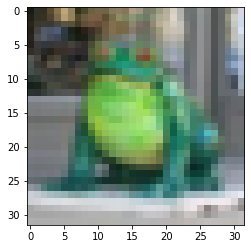

In [20]:
plt.imshow(X[19]);

In [21]:
X = data_batch1[b"data"]

In [22]:
all_images = X.reshape(10000, 3, 32, 32)

In [23]:
sample = all_images[0]

In [24]:
sample

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [25]:
sample.shape

(3, 32, 32)

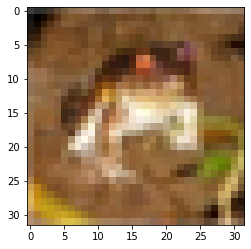

In [26]:
plt.imshow(sample.transpose(1,2,0));

Helper function for dealing data

In [27]:
def one_hot_encode(vec, vals = 10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec]= 1
    return out

In [28]:
class CifarHelper():
    def __init__(self):
        self.i = 0
        #grab a list of all the data batches for training
        self.all_train_batches = [data_batch1, data_batch2, data_batch3, data_batch4, data_batch5]
        self.test_batch = [test_batch]
        #Initialize same empty variables for later on
        self.training_images = None
        self.training_labels = None
        self.test_images = None
        self.test_labels = None
        
    def set_up_images(self):
        print("Setting up Training Images and labels")
        # vertically stacks the training images
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        # reshape and normalize training images
        self.training_images = self.training_images.reshape(train_len, 3, 32, 32).transpose(0,2,3,1)/255
        # one hot encode the training labels e.g. [0,0,0,10,0,0,0,0,0]
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]))
        print("Setting up test images and labels")
        # vertically stack the test images
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch ])
        test_len = len(self.test_images)
        # reshape and normalize test images
        self.test_images = self.test_images.reshape(test_len, 3, 32, 32).transpose(0,2,3,1)/255
        # one hot encode the training labels e.g. [0,0,0,10,0,0,0,0,0]
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i + batch_size].reshape(100, 32, 32, 3)
        y = self.traing_labels[self.i:self.i + batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [ ]:
ch = CifarHelper()
ch.set_up_images()

Setting up Training Images and labels
Setting up test images and labels


In [29]:
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])

In [30]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [31]:
# create placeholder called hold_prob, will just hold a single probability for a dropout
hold_prob = tf.placeholder(tf.float32)

In [32]:
# helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape = shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x,W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) +b

In [33]:
# create the layers
convo_1 = convolutional_layer(x, shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [34]:
# create the layers
convo_2 = convolutional_layer(convo_1_pooling, shape=[4,4,32, 64])
convo_2_pooling = max_pool_2by2(convo_2)

In [35]:
# flatten layer by reshaping the pooling layer into
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 8*8*64])

In [36]:
 full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [37]:
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob = hold_prob)

W0918 21:14:56.895281 140481884411712 deprecation.py:506] From <ipython-input-37-e2f13c473273>:1: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
# the size should be 10 because of the 10 possible labels
y_pred = normal_full_layer(full_one_dropout, 10)

In [39]:
#loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits=y_pred))

W0918 21:15:00.593793 140481884411712 deprecation.py:323] From <ipython-input-39-3ab326761c34>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [40]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)

In [41]:
train = optimizer.minimize(cross_entropy)

In [42]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict = {x: batch[0], y_true:batch[1], hold_prob:0.5})
        if i%100 == 0:
            print("STEP:{}".format(i))
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            print(sess.run(acc, feed_dict = {x:test_images, y_true : ch.test_labels, hold_prob:1.0}))
            print('\n')

NameError: name 'ch' is not defined